# Natural Language Processing (NLP) Messi

## Proyecto PopArt

1. Análisis de frequencia de palabras
2. Computo de TF-iDF
3. EDA
4. Clusterización vía NMF (selección de tópicos)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/processed/messi_comments_cleaned.csv', skipinitialspace=True)

In [4]:
df.head(10)

_id                    _index  _score _type    page_name  \
0  1.800000e+16  social__instagram__messi       1   doc  messicirque   
1  1.790000e+16  social__instagram__messi       1   doc  messicirque   
2  1.800000e+16  social__instagram__messi       1   doc  messicirque   
3  1.790000e+16  social__instagram__messi       1   doc  messicirque   
4  1.790000e+16  social__instagram__messi       1   doc  messicirque   
5  1.790000e+16  social__instagram__messi       1   doc  messicirque   
6  1.800000e+16  social__instagram__messi       1   doc  messicirque   
7  1.800000e+16  social__instagram__messi       1   doc  messicirque   
8  1.800000e+16  social__instagram__messi       1   doc  messicirque   
9  1.790000e+16  social__instagram__messi       1   doc  messicirque   

                                            raw_text  \
0                                               ❤️🔥🐐   
1                                                 💖💖   
2                  Consider coming to Chicago plz 🙏🏻   
3                           @calcagnoc @mariolymonge   
4                             @icriango92 daleeeeeee   
5                        @uelinton_lima #messicirque   
6                          King of Kings @leomessi 👑   
7                                 Gran Capi‼️❤️💙👑🐐🇦🇷   
8  Ola mesis si quiero ganar una entrada para yo ...   
9                                              👑❤️🙏🏾   

                                                text               type  \
0                                                NaN  instagram_comment   
1                                                NaN  instagram_comment   
2                    consider coming to chicago plz   instagram_comment   
3                           @calcagnoc @mariolymonge  instagram_comment   
4                             @icriango92 daleeeeeee  instagram_comment   
5                        @uelinton_lima #messicirque  instagram_comment   
6                           king of kings @leomessi   instagram_comment   
7                                        gran capi!!  instagram_comment   
8  ola mesis si quiero ganar una entrada para yo ...  instagram_comment   
9                                                NaN  instagram_comment   

  detected_language  lowercased_text  text_no_urls  text_no_special_chars  \
0           unknown              NaN           NaN                    NaN   
1           unknown              NaN           NaN                    NaN   
2                en              NaN           NaN                    NaN   
3                it              NaN           NaN                    NaN   
4                nl              NaN           NaN                    NaN   
5                it              NaN           NaN                    NaN   
6                en              NaN           NaN                    NaN   
7                ca              NaN           NaN                    NaN   
8                es              NaN           NaN                    NaN   
9           unknown              NaN           NaN                    NaN   

   text_no_stopwords  stemmed_text  
0                NaN           NaN  
1                NaN           NaN  
2                NaN           NaN  
3                NaN           NaN  
4                NaN           NaN  
5                NaN           NaN  
6                NaN           NaN  
7                NaN           NaN  
8                NaN           NaN  
9                NaN           NaN

In [6]:
df.tail(10)

_id                    _index  _score _type    page_name  \
394628  1.790000e+16  social__instagram__messi       1   doc     leomessi   
394629  1.790000e+16  social__instagram__messi       1   doc     leomessi   
394630  1.790000e+16  social__instagram__messi       1   doc     leomessi   
394631  1.800000e+16  social__instagram__messi       1   doc  messifans00   
394632  1.790000e+16  social__instagram__messi       1   doc  messifans00   
394633  1.810000e+16  social__instagram__messi       1   doc  messifans00   
394634  1.790000e+16  social__instagram__messi       1   doc     leomessi   
394635  1.790000e+16  social__instagram__messi       1   doc     leomessi   
394636  1.800000e+16  social__instagram__messi       1   doc     leomessi   
394637  1.800000e+16  social__instagram__messi       1   doc  messifans00   

                                 raw_text                               text  \
394628                               Waww                               waww   
394629                           احبك يول                                NaN   
394630                                 ♥♥                                NaN   
394631                           Leoooooo                           leoooooo   
394632                         حبيبي احبك                                NaN   
394633                               👏👏👏👍                                NaN   
394634                                Kdk                                kdk   
394635                             TE AMO                             te amo   
394636                            GOAT!!!                            goat!!!   
394637  Grande Messi...sos el único Messi  grande messi...sos el unico messi   

                     type detected_language  lowercased_text  text_no_urls  \
394628  instagram_comment                sw              NaN           NaN   
394629  instagram_comment                ar              NaN           NaN   
394630  instagram_comment           unknown              NaN           NaN   
394631  instagram_comment                et              NaN           NaN   
394632  instagram_comment                ar              NaN           NaN   
394633  instagram_comment           unknown              NaN           NaN   
394634  instagram_comment                so              NaN           NaN   
394635  instagram_comment                vi              NaN           NaN   
394636  instagram_comment                de              NaN           NaN   
394637  instagram_comment                pt              NaN           NaN   

        text_no_special_chars  text_no_stopwords  stemmed_text  
394628                    NaN                NaN           NaN  
394629                    NaN                NaN           NaN  
394630                    NaN                NaN           NaN  
394631                    NaN                NaN           NaN  
394632                    NaN                NaN           NaN  
394633                    NaN                NaN           NaN  
394634                    NaN                NaN           NaN  
394635                    NaN                NaN           NaN  
394636                    NaN                NaN           NaN  
394637                    NaN                NaN           NaN

In [7]:
df.columns

Index(['_id', '_index', '_score', '_type', 'page_name', 'raw_text', 'text',
       'type', 'detected_language', 'lowercased_text', 'text_no_urls',
       'text_no_special_chars', 'text_no_stopwords', 'stemmed_text'],
      dtype='object')

In [9]:
print ("We have {} documents in the dataset".format(df['_id'].count())) 

We have 394638 documents in the dataset


In [11]:
#Instragram accounts where the comments were extracted
df['page_name'].unique()

array(['messicirque', 'lionelmessihdi', 'leomessi', 'extra10time',
       'allbarcahd', 'messipics', 'messifans00'], dtype=object)

In [12]:
#Type of documents in the dataset
df['type'].value_counts()

instagram_comment    394638
Name: type, dtype: int64

In [13]:
#Comments by page
df.loc[df['type']=='instagram_comment']['page_name'].value_counts()

leomessi          392796
messicirque         1585
messifans00          101
lionelmessihdi        62
extra10time           54
allbarcahd            20
messipics             20
Name: page_name, dtype: int64

In [14]:
#I'll keep only the documents with text available after cleaning
df_analisis = df[df['text'].notnull()]

## EDA
Exploring the dataset to understand the conversation

In [17]:
# Analisis Tf-idf y NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF

# Printing cool stuff
from stop_words import get_stop_words

In [18]:
stop_words_sp = get_stop_words("es")
stop_words_en = get_stop_words("en")

In [19]:
#Im adding some extra stop words as I run the analysis
stop_words_extra = ['mar', 'donatodesantis', 'dia', 'hoy', 'paro', 'conmemora', 'nacimiento', 'manuel', 'belgrano','italiano', 'italianos', 'inmigrantes', 'inmigrante', 'https', 'rt', 'da', 'saramucha', 'si', 'of', 'to', 'num', 'aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'happy', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn','birthday', 'feliz', 'cumpleano', 'feliz cumpleano', 'happy birthday','stand_with_kerala', 'kerala', 'standwithkerala', 'standwithkerala', 'leomessi', 'we', 'in', 'the', 'leo', 'are', 'you','your', 'and', 'of', 'to', 'for', 'is','do',]
stop_words = stop_words_sp + stop_words_extra

## Most frequent words in corpus

In [22]:
corpus = df_analisis['text'].values

In [39]:
#I want to check for top frequen words, so I'll use CountVectorizer. I'll use ngram_range=(1, 3) to get unigrams, bigrams and trigrams
def get_top_n_words(corpus, n=None, ngram_range=(1, 3)):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

<Figure size 1500x1000 with 0 Axes>

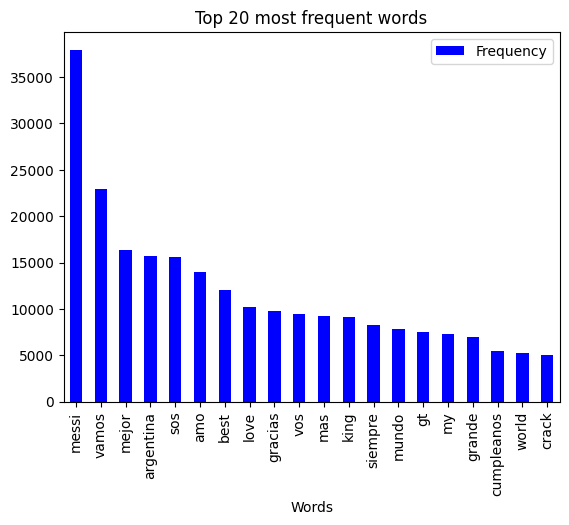

In [57]:
#I'll get the top 20 most frequent words
top_words = pd.DataFrame(get_top_n_words(corpus, n=100), columns = ["Words", "Frequency"])

#Plot
plt.figure(figsize=(15,10))
top_words.head(20).plot(kind='bar', x='Words', y='Frequency', color='blue')
plt.title('Top 20 most frequent words')
plt.show();

## Word Clouds

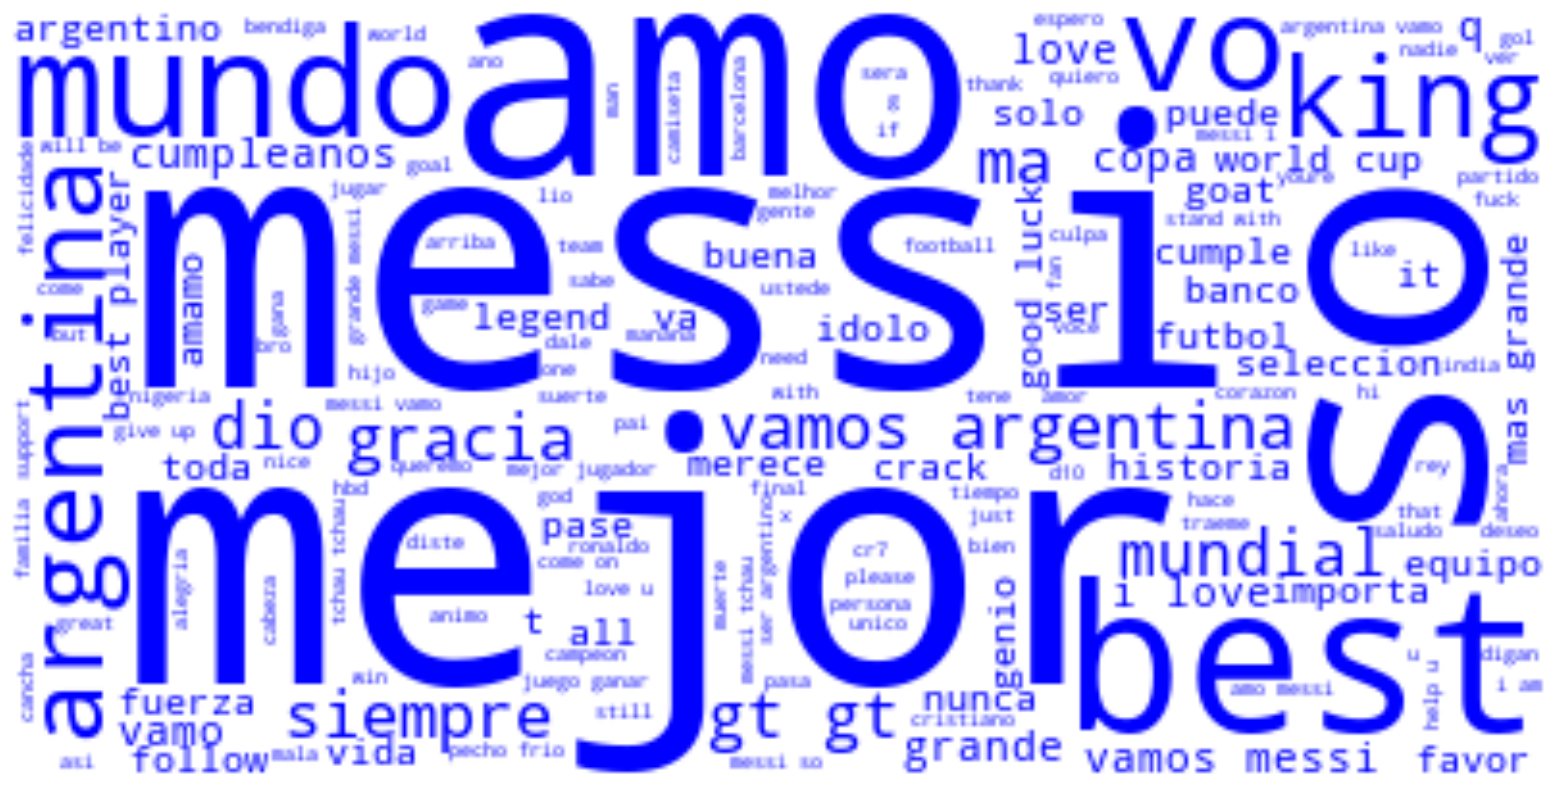

In [33]:
# Text for the wordcloud
word_cloud = ' '.join(df_analisis['text'])

# Create the wordcloud object
plt.figure(figsize=(20,10))
wordcloud_topwords = WordCloud(stopwords= stop_words, color_func=lambda *args, **kwargs: "blue", max_words=500, background_color="white").generate(word_cloud)
plt.imshow(wordcloud_topwords, interpolation="bilinear")
plt.axis("off")
plt.show();

## Topic Detection

The goal is to identify the two main topics of the conversation about Messi. For this, an analysis is performed using NMF (Negative Matrix Frequency) with two vectors. The working hypothesis is that if there is polarization around the conversation about Messi, we should observe, when separating it into two topics, one with negative references and the other with positive references.

### TF-IDF

In [ ]:
# Generate the vectors 
count_vect = CountVectorizer(ngram_range = (1,3), max_df = 0.8, min_df = 0.01,stop_words=stop_words, lowercase=True)
x_counts = count_vect.fit_transform(corpus)

# Generate matrix with tf-idf valuation
tfidf_transformer = TfidfTransformer(norm = 'l2')
x_tfidf = tfidf_transformer.fit_transform(x_counts)

print(x_tfidf.shape)

(277042, 46)


In [41]:
#NMF Stuffs

# impongo el número de  tópicos
dim = 2

#Instancio NMF
nmf = NMF(n_components = dim)
nmf_array = nmf.fit_transform(x_tfidf)

In [42]:
# Labels
labels = [np.argmax(x) for x in nmf_array]

In [45]:
# Componentes y nombre de los feautures
components = [nmf.components_[i] for i in range(len(nmf.components_))]
features = count_vect.get_feature_names_out().tolist()

for j in range(len(components)):

    comp = components[j]

    prior_features = sorted(features, key = lambda x: comp[features.index(x)], reverse = True)

    # Guardo en archivos los features de cada componente ordenados por prioridad y 
    # los comments asociados a cada tópico.
    fp = open('NMFComponent{}.txt'.format(j),'a')
    for k in prior_features:
        fp.write('{}, '.format(k.encode("UTF-8")))
    fp.close()
    
    
    fp = open('NMFNotes{}.txt'.format(j),'a')
    for k in range(len(labels)):
        if labels[k] == j:
            fp.write('{}, '.format(k))
    fp.close()

In [46]:
#como saqué los labels con el NMF lo agrego al dataframe
df_analisis.loc[:,'label'] = labels
df_analisis.head()

_id                    _index  _score _type    page_name  \
2  1.800000e+16  social__instagram__messi       1   doc  messicirque   
3  1.790000e+16  social__instagram__messi       1   doc  messicirque   
4  1.790000e+16  social__instagram__messi       1   doc  messicirque   
5  1.790000e+16  social__instagram__messi       1   doc  messicirque   
6  1.800000e+16  social__instagram__messi       1   doc  messicirque   

                            raw_text                             text  \
2  Consider coming to Chicago plz 🙏🏻  consider coming to chicago plz    
3           @calcagnoc @mariolymonge         @calcagnoc @mariolymonge   
4             @icriango92 daleeeeeee           @icriango92 daleeeeeee   
5        @uelinton_lima #messicirque      @uelinton_lima #messicirque   
6          King of Kings @leomessi 👑         king of kings @leomessi    

                type detected_language  lowercased_text  text_no_urls  \
2  instagram_comment                en              NaN           NaN   
3  instagram_comment                it              NaN           NaN   
4  instagram_comment                nl              NaN           NaN   
5  instagram_comment                it              NaN           NaN   
6  instagram_comment                en              NaN           NaN   

   text_no_special_chars  text_no_stopwords  stemmed_text  label  
2                    NaN                NaN           NaN      0  
3                    NaN                NaN           NaN      0  
4                    NaN                NaN           NaN      0  
5                    NaN                NaN           NaN      0  
6                    NaN                NaN           NaN      0

In [47]:
df_analisis[['_id', 'label']].groupby('label').count()

_id
label        
0      203747
1       73295

In [48]:
#genero dataframes con los diferentes labels
nmf0 = df_analisis.loc[df_analisis['label'] == 0]
nmf1 = df_analisis.loc[df_analisis['label'] == 1]

In [49]:
#para hacer el wordcloud necesito sólo el cuerpo
nmf0_ = ' '.join(nmf0['text'])
nmf1_ = ' '.join(nmf1['text'])

## Topics: visual representation

Al generar dos únicos topicos de todos los comentarios muestrados recibidos por Messi se puede observar que se trata de un universo claramente positivo, por un lado tenemos saludos generales en inglés, y por otro lado tenemos alusiones puntuales a la selección argentina. 

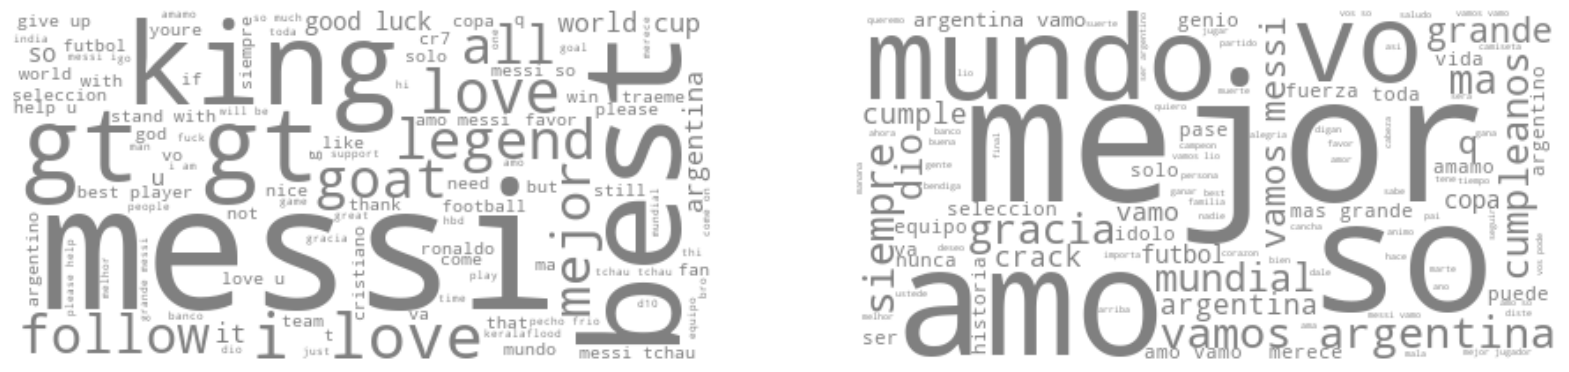

In [53]:
 #Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 15))

# Generate the first word cloud
wordcloud0 = WordCloud(stopwords=stop_words, color_func=lambda *args, **kwargs: "gray", max_font_size=100, max_words=100, background_color="white").generate(nmf0_)
axes[0].imshow(wordcloud0, interpolation="bilinear")
axes[0].axis("off")  # Turn off axis

# Generate the second word cloud
wordcloud1 = WordCloud(stopwords=stop_words, color_func=lambda *args, **kwargs: "gray", max_font_size=100, max_words=100, background_color="white").generate(nmf1_)
axes[1].imshow(wordcloud1, interpolation="bilinear")
axes[1].axis("off")  # Turn off axis

# Show the plot
plt.show()

From the resulting word cloud of the NMF with two dimensions, it can be seen that one of the resulting topics is related to affectionate greetings towards Messi in general (most of them in English), while the other topic refers to the player's relationship with the Argentine National Team and specifically has to do with positive messages.

There is no evidence for a polarization based on this data

## Word to Vector (WDV)

Análisis de distancias entre las palabras presentes en el vocabulario del corpus

### Corpus cleaning

In [2]:
from gensim import corpora, models, similarities, matutils
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.matutils import cossim
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer

In [50]:
messi_analisis_dict = messi_analisis.to_dict()

In [51]:
messi_analisis_dict.keys()

dict_keys(['_id', '_index', '_score', '_type', 'page_name', 'raw_text', 'text', 'type', 'label'])

In [52]:
comments = []
for hit in messi_analisis_dict['text']:
    comments.append(''.join(messi_analisis_dict['text'][hit]))

In [53]:
with open('messi_corpus.txt', 'w') as f:
    print(comments, file=f)

In [370]:
corpus = open("messi_corpus.txt", 'r').read() 

In [371]:
#Primeras mil palabras del corpus
corpus[:1000]

"['@leomessi  panama (copa america 2016) ', 'consider coming to chicago plz ', '@calcagnoc @mariolymonge', '@icriango92 daleeeeeee', '@uelinton_lima #messicirque', 'king of kings @leomessi ', 'gran capi!!', '#concurso \\r\\nquieres ganar 1 entrada doble para el estreno de messi10 by cirque du soleil ?\\r\\nsera una funcion especial e inolvidable.  solo tienes que darte una vuelta por la ciudad de barcelona, encontrar algun anuncio donde aparezca la imagen de messi10 by cirque du soleil y hacerte una foto o video divertido donde aparezcas tu.\\r\\n\\r\\npuedes ganar uno de estos premios:\\r\\n_ 1 entrada doble para la funcion inaugural\\r\\n_ o una de las 5 entradas dobles para las siguientes funciones.\\r\\nmira este video, te dara pistas por donde puedes moverte. date prisa, tienes hasta el 10 de marzo!\\r\\n\\r\\n#messicirque #concurso\\r\\n\\r\\nhttps://a.cstmapp.com/p/30214\\r\\n\\r\\nmecanica del concurso\\r\\n\\r\\nmessi10 by cirque du soleil te invita a que participes en su conc

In [372]:
# reemplazo los números
reg_num = re.compile(r"\d+[.,]?\d*") # Regular expression to search numbers
corpus = reg_num.sub(" NUM ",corpus).lower()  
print (corpus[:1000])

['@leomessi  panama (copa america  num ) ', 'consider coming to chicago plz ', '@calcagnoc @mariolymonge', '@icriango num  daleeeeeee', '@uelinton_lima #messicirque', 'king of kings @leomessi ', 'gran capi!!', '#concurso \r\nquieres ganar  num  entrada doble para el estreno de messi num  by cirque du soleil ?\r\nsera una funcion especial e inolvidable.  solo tienes que darte una vuelta por la ciudad de barcelona, encontrar algun anuncio donde aparezca la imagen de messi num  by cirque du soleil y hacerte una foto o video divertido donde aparezcas tu.\r\n\r\npuedes ganar uno de estos premios:\r\n_  num  entrada doble para la funcion inaugural\r\n_ o una de las  num  entradas dobles para las siguientes funciones.\r\nmira este video, te dara pistas por donde puedes moverte. date prisa, tienes hasta el  num  de marzo!\r\n\r\n#messicirque #concurso\r\n\r\nhttps://a.cstmapp.com/p/ num \r\n\r\nmecanica del concurso\r\n\r\nmessi num  by cirque du soleil te invita a que participes en su concurs

In [1]:
# elimino carácteres
corpus = corpus.replace('@','')
corpus = corpus.replace('#','')
corpus = corpus.replace('\\r\\','')
corpus = corpus.replace("\'" , '')
corpus = corpus.replace("$" , '')
corpus = corpus.replace('StandWithKerala', '')
corpus = corpus.replace("https://youtu.be/i" , '')
corpus = corpus.replace("http://www.wasap.my", '')
corpus = corpus.replace("https://a.cstmapp.com", '')
corpus = corpus.replace("?", '')
corpus = corpus.replace("!", '')
corpus = corpus.replace("mesi", 'messi')
corpus = corpus.replace("messii", 'messi')
corpus = corpus.replace('idolooooooo', 'idolo')
corpus = corpus.replace('youuuuuu', 'you')
corpus = corpus.replace('kiiing', 'king')
corpus = corpus.replace('lovee', 'love')
corpus = corpus.replace('youuuuuuu', 'you')
corpus = corpus.replace('hermosooo', 'hermoso')
corpus = corpus.replace('uuuuu', 'u')
corpus = corpus.replace('daleeeeeee', 'dale')
corpus = corpus.replace('mannn', 'man')
corpus = corpus.replace('lindooooo', 'lindo')
corpus = corpus.replace('wachoooo', 'guacho')
corpus = corpus.replace('lave', 'love')
corpus = corpus.replace('kkkkkkkkkkkkkkkk', 'king')
corpus = corpus.replace('kinggggg', 'king')
corpus = corpus.replace('grandeeeeeee', 'grande')
corpus = corpus.replace('craaaack', 'crack')
corpus = corpus.replace('vamoossssss', 'vamos')
corpus = corpus.replace('vamps', 'vamos')
corpus = corpus.replace('tuyaaa', 'tuya')
corpus = corpus.replace('podesss', 'podes')
corpus = corpus.replace('puedeeee', 'puede')
corpus = corpus.replace('vamooss', 'vamos')
corpus = corpus.replace('vamoos', 'vamos')
corpus = corpus.replace('papaaaa', 'papa')
corpus = corpus.replace('campeonnnn', 'campeon')
corpus = corpus.replace('neneeee', 'nene')
corpus = corpus.replace('fuerzasss', 'fuerza')
corpus = corpus.replace('fuerzaaa', 'fuerza')
corpus = corpus.replace('argentinaaa', 'argentina')
corpus = corpus.replace('leeooo', 'leo')
corpus = corpus.replace('vamooooo', 'vamos')
corpus = corpus.replace('genioooooooooo', 'genio')
corpus = corpus.replace('vamosss', 'vamos')
corpus = corpus.replace('vamod', 'vamos')
corpus = corpus.replace('suerteeee', 'suerte')
corpus = corpus.replace('dioss', 'dios')
corpus = corpus.replace('kiiiiing', 'king')
corpus = corpus.replace('messsssi', 'messi')
corpus = corpus.replace('bancoo', 'banco')
corpus = corpus.replace('locoooo', 'loco')
corpus = corpus.replace('ting', 'king')
corpus = corpus.replace('messiiiiiiiiii', 'messi')
corpus = corpus.replace('messiiiiiiii', 'messi')
corpus = corpus.replace('messsiiiiii', 'messi')
corpus = corpus.replace('messsiiii', 'messi')
corpus = corpus.replace('messiiii', 'messi')
corpus = corpus.replace('argntina', 'argentina')
corpus = corpus.replace('agentina', 'argentina')
corpus = corpus.replace('argentinaaaaaaa', 'argentina')
corpus = corpus.replace('oof', '')
corpus = corpus.replace('ly', '')
corpus = corpus.replace('kkkkkkkkkkkkk', 
                        'king')


print (corpus[:1000])

NameError: name 'corpus' is not defined

In [374]:
corpus = sent_tokenize(corpus)

In [375]:
# tiro los tokens no alphabeticos 
trainset = []
for sent in tqdm(corpus):
    tokens = []#corpus
    for token in word_tokenize(sent):
        if token.isalpha():
            tokens.append(token)
    trainset.append(tokens)

100%|██████████████████████████████████████████████████████████████████████████| 37458/37458 [00:11<00:00, 3131.19it/s]


In [185]:
#trainset[1]

In [289]:
print ("el corpus tiene",len(trainset), "oraciones y",sum([len(x) for x in trainset]),"palabras")

el corpus tiene 37458 oraciones y 2093336 palabras


In [376]:
# "window" es el tamaño de la ventana. windows = 10, usa 10 palabras a la izquierda y 10 palabras a la derecha
# "n_dim" es la dimension (i.e. el largo) de los vectores de word2vec
# "workers" es el numero de cores que usa en paralelo. Para aprobechar eso es necesario tener instalado Cython)
# "sample": word2vec filtra palabras que aparecen una fraccion mayor que "sample"
# "min_count": Word2vec filtra palabras con menos apariciones que  "min_count"
# "sg": para correr el Skipgram model (sg = 1), para correr el CBOW (sg = 0)
# para mas detalle ver: https://radimrehurek.com/gensim/models/word2vec.html
n_dim = 20
w2v_model = Word2Vec(trainset, workers=4,size=n_dim, min_count = 10, window = 7, sample = 1e-2,negative=10,sg=1)

In [ ]:
w2v_model.save("messi_2dim")  # save model

In [ ]:
#w2v_model = Word2Vec.load("messi_2dim")  # load model ww

In [ ]:
w2v_model["messi"]  #representacion de una palabra

In [ ]:
w2v_model.similarity('die', 'man')

In [392]:
w2v_model.most_similar(positive=["messi"], negative=[], topn=15)

[('golll', 0.9253660440444946),
 ('bravo', 0.9240369200706482),
 ('messiii', 0.9233914613723755),
 ('messii', 0.9214599132537842),
 ('yesss', 0.9205090403556824),
 ('yessss', 0.9172228574752808),
 ('dude', 0.9092600345611572),
 ('siiiii', 0.9088618755340576),
 ('genioooooo', 0.9085427522659302),
 ('vamosooos', 0.9080932140350342),
 ('grandee', 0.9079586267471313),
 ('tango', 0.9066406488418579),
 ('puto', 0.9043188691139221),
 ('messssssi', 0.9037165641784668),
 ('ww', 0.9034016728401184)]

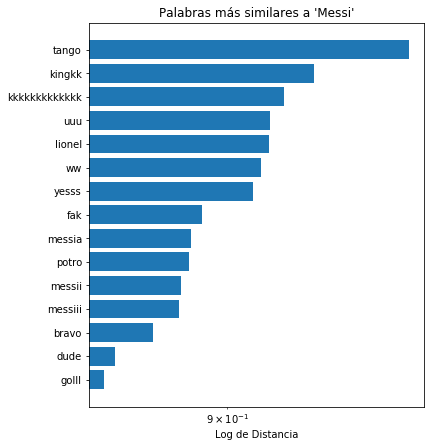

In [368]:
plt.figure(figsize=(6, 24))

plt.subplot(3,1,1)
plt.barh(y = messi_dist["palabras_similares"], width = messi_dist["distancia"], log = True)
plt.xlabel("Log de Distancia")
plt.title("Palabras más similares a 'Messi'")




plt.show();

In [393]:
w2v_model.most_similar(positive=["seleccion"], negative=[], topn=15)

[('sele', 0.9266023635864258),
 ('camiseta', 0.9262325167655945),
 ('cancha', 0.9248099327087402),
 ('hinchada', 0.9212325811386108),
 ('ponerte', 0.9210584163665771),
 ('espalda', 0.9085918068885803),
 ('albiceleste', 0.9042452573776245),
 ('infeliz', 0.9029017686843872),
 ('ilusion', 0.9007374048233032),
 ('volviste', 0.8997285962104797),
 ('adrenalina', 0.8989073038101196),
 ('volvas', 0.8984571695327759),
 ('dejamos', 0.8984449505805969),
 ('remera', 0.8967585563659668),
 ('medida', 0.8963816165924072)]

In [394]:
w2v_model.most_similar(positive=["sampaoli"], negative=[], topn=15) # Va

[('caballero', 0.9631600379943848),
 ('payaso', 0.879263699054718),
 ('basura', 0.8772385120391846),
 ('pelotudo', 0.8690248727798462),
 ('ego', 0.8682601451873779),
 ('dt', 0.8588343858718872),
 ('forro', 0.8523914217948914),
 ('diego', 0.8504208922386169),
 ('inutil', 0.8473417162895203),
 ('pelado', 0.8468902707099915),
 ('dibala', 0.842968761920929),
 ('imbecil', 0.8421328067779541),
 ('cargo', 0.8265243768692017),
 ('pobre', 0.8258147239685059),
 ('brillo', 0.8251972794532776)]

In [395]:
w2v_model.most_similar(positive=["pechofrio"], negative=[], topn=15)

[('fak', 0.9250161051750183),
 ('gato', 0.9108879566192627),
 ('jajaj', 0.9103927612304688),
 ('omg', 0.907278299331665),
 ('mee', 0.9051697254180908),
 ('pessi', 0.8969961404800415),
 ('meesi', 0.8951314687728882),
 ('uuu', 0.8939744234085083),
 ('pussy', 0.8933157324790955),
 ('xd', 0.8933088183403015),
 ('ridi', 0.8909726142883301),
 ('mesai', 0.8908847570419312),
 ('mssi', 0.8907573223114014),
 ('boludo', 0.8880152702331543),
 ('mann', 0.8850806951522827)]

In [396]:
w2v_model.most_similar(positive=["argentina"], negative=[], topn=15)

[('argentinaa', 0.9321953654289246),
 ('argentinavamos', 0.9008485078811646),
 ('vamos', 0.8965741991996765),
 ('carajooooo', 0.895179808139801),
 ('argentinaaa', 0.8946577906608582),
 ('vamosleomessi', 0.8910595178604126),
 ('argetina', 0.8900355696678162),
 ('carajoo', 0.8897110223770142),
 ('argentinaaaaaa', 0.8883539438247681),
 ('tango', 0.8879369497299194),
 ('gooool', 0.8838252425193787),
 ('liooooooo', 0.88225257396698),
 ('carajoooo', 0.8817970156669617),
 ('vamosos', 0.8799743056297302),
 ('vamosooos', 0.8788708448410034)]

In [442]:
w2v_model.most_similar(positive=["mundial", "proximo"], negative=[], topn=15)

[('tullo', 0.9341415166854858),
 ('campeonato', 0.9303641319274902),
 ('ganara', 0.9218364953994751),
 ('quatar', 0.9168767333030701),
 ('premio', 0.9088348150253296),
 ('partido', 0.9085777997970581),
 ('ultimo', 0.8965132236480713),
 ('mundia', 0.895465612411499),
 ('comienzo', 0.8954441547393799),
 ('tuyooo', 0.8844950199127197),
 ('ganaremos', 0.8824582099914551),
 ('ano', 0.8793842792510986),
 ('marte', 0.8780961036682129),
 ('mjr', 0.8763911724090576),
 ('imposible', 0.8763320446014404)]

In [492]:
w2v_model.most_similar(positive=["malo"], negative=[], topn=15)

[('ql', 0.9404310584068298),
 ('qlo', 0.9138107299804688),
 ('gil', 0.9118647575378418),
 ('wn', 0.8997035026550293),
 ('ctm', 0.8975353240966797),
 ('jajajaja', 0.896727442741394),
 ('boludo', 0.8946307897567749),
 ('pecho', 0.8874895572662354),
 ('pelotudo', 0.8861780166625977),
 ('inutil', 0.8858286738395691),
 ('frio', 0.8854597210884094),
 ('pinche', 0.8829212784767151),
 ('culiao', 0.8790780305862427),
 ('basura', 0.8782638311386108),
 ('pobre', 0.8772199749946594)]

## Reducción de Dimensionalidad y Visualización

In [470]:
haters = ["pechofrio","overrated","fuck","basura","boludo","amargo", "pessi", 'losser', 'midget', 'fool'] # 10palabras Haters
lovers = ["mejor","vamos","loco","podes","aguante","king","goat",'legend', 'tank', 'banco'] #10 palabras Lovers
neutras = ["argentina","barcelona","barca","club","suarez", "sampaoli", "seleccion", "fifa", "mundial", "cup"] #10 palabras temáticas
target = ["messi"]
palabras = haters + lovers + neutras + target
colores = ["red"]*len(haters)+["green"]*len(lovers)+["blue"]*len(neutras)+["black"]*len(target)

In [471]:
# Armo una matriz de distancias
distancias=np.zeros((len(palabras),len(palabras))) #matriz cuadrada
for i,ti in enumerate(palabras):
    for j,tj in enumerate(palabras):
        distancias[i,j] = abs(1-w2v_model.wv.similarity(ti,tj))
print (distancias.shape)

(31, 31)


In [472]:
# Reduccion de la dimensionalidad y visualizacion 
from sklearn.manifold import MDS
from sklearn.manifold import TSNE 
def visualize_embeddings(distancias,palabras,colores,perplexity):
    plt.figure(figsize=(15,10))
    # Reduccion de la dimensionalidad y visualizacion 
    mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                       dissimilarity="precomputed", n_jobs=4)
    Y = mds.fit(distancias).embedding_
    #plt.subplot(1,2,1)
    plt.scatter(Y[:, 0], Y[:, 1],color="black",s=3)
    for label, x, y, color in zip(palabras, Y[:, 0], Y[:, 1],colores):
        plt.annotate(label, xy=(x, y), xytext=(0, 0),color=color, textcoords='offset points',size=10)
    #plt.title("MDS")
    # Reduccion de la dimensionalidad y visualizacion 
    #tsne = TSNE(n_components=2,metric="precomputed",learning_rate=1000, random_state=123,perplexity=perplexity)
    #np.set_printoptions(suppress=True)
    #plt.subplot(1,2,2)
    #Y = tsne.fit_transform(distancias)
    #plt.scatter(Y[:, 0], Y[:, 1],color="black",s=3)
    #for label, x, y, color in zip(palabras, Y[:, 0], Y[:, 1],colores):
        #plt.annotate(label, xy=(x, y), xytext=(0, 0),color=color, textcoords='offset points',size=13)
    #plt.title("TSNE")

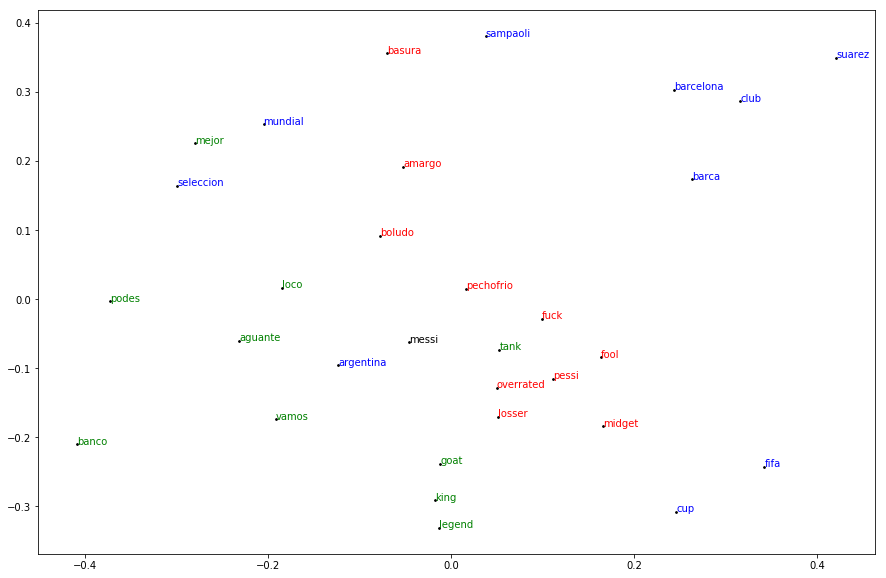

In [473]:
visualize_embeddings(distancias,palabras,colores,perplexity=10)

In [476]:
top_words = pd.DataFrame(get_top_n_words(corpus, n=30000), columns = ["Palabras", "Frequencia absoluta"])

In [491]:
pd.options.display.max_rows = 30000
top_words

Palabras  Frequencia absoluta
0                                                  messi                37987
1                                                  vamos                22978
2                                                  mejor                16337
3                                              argentina                15743
4                                                    sos                15555
5                                                    amo                13943
6                                                   best                12057
7                                                   love                10227
8                                                gracias                 9735
9                                                    vos                 9432
10                                                   mas                 9233
11                                                  king                 9169
12                                               siempre                 8308
13                                                 mundo                 7866
14                                                    gt                 7554
15                                                grande                 6970
16                                            cumpleanos                 5475
17                                                 world                 5276
18                                                 crack                 5020
19                                                  copa                 4839
20                                               mundial                 4647
21                                                cumple                 4471
22                                                follow                 4330
23                                                please                 4246
24                                                   ser                 3980
25                                                  will                 3933
26                                                  dios                 3921
27                                                 genio                 3901
28                                                  good                 3791
29                                                  dont                 3763
30                                                  luck                 3301
31                                                legend                 3262
32                                                   cup                 3071
33                                                futbol                 3059
34                                                   lio                 3041
35                                                  goat                 3023
36                                                always                 3003
37                                             seleccion                 3000
38                                                  solo                 2936
39                                                 idolo                 2932
40                                                  help                 2864
41                                                player                 2849
42                                                    go                 2725
43                                                  come                 2597
44                                                   win                 2568
45                                                 still                 2543
46                                                   hoy                 2533
47                                                 nunca                 2503
48                                              football                 2482
49                                                  like                 2473
50                                               jugador              

In [296]:
messi_analisis[['text']].count()

text    277079
dtype: int64

In [474]:
q_haters = messi_analisis["_id"][messi_analisis['text'].str.contains("pechofrio|overrated|fuck|basura|boludo|amargo|pessi|losser|midget|fool", regex = True)].count()
print ("Las palabras negativas 'Haters' están en {} comentarios".format(q_haters))

Las palabras negativas 'Haters' están en 1777 comentarios


In [298]:
q_lovers = messi_analisis["_id"][messi_analisis['text'].str.contains("mejoor|vamos|locoooo|podesss|aguante|king|goat|legend|tank|banco", regex = True)].count()
print ("Las palabras positivas 'lovers' están en {} comentarios".format(q_lovers))

Las palabras positivas 'lovers' están en 40594 comentarios


In [475]:
q_lovers = messi_analisis["_id"][messi_analisis['text'].str.contains("mejor|vamos|loco|podes|aguante|king|goat|legend|tank|banco", regex = True)].count()
print ("Las palabras positivas 'lovers' están en {} comentarios".format(q_lovers))


Las palabras positivas 'lovers' están en 54364 comentarios


In [459]:
q_neutras = messi_analisis["_id"][messi_analisis['text'].str.contains("argentina|barcelona|barca|club|suarez|sampaoli|seleccion|fifa|mundial|cup", regex = True)].count()
print ("Las palabras neutrales están en {} comentarios".format(q_neutras))

Las palabras neutrales están en 25709 comentarios


## Word to Vector (WDV) - ARGETINA

Análisis sobre el tópico "Argentina"

In [ ]:
messi_analisis_arg = messi_analisis[messi_analisis['label'] == 1].reset_index().drop('index', axis = 1)

In [ ]:
messi_analisis_arg.head()

In [ ]:
corpus_ar = messi_analisis_arg['text'].values

In [ ]:
# Top 50 frequency words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

get_top_n_words(corpus_ar, n=50)

In [ ]:
messi_analisis_dict_ar = messi_analisis_arg.to_dict()

In [ ]:
comments_ar = []
for hit in messi_analisis_dict_ar['text']:
    comments.append(''.join(messi_analisis_dict_ar['text'][hit]))

In [ ]:
with open('messi_corpus_ar.txt', 'w') as f:
    print(comments, file=f)

In [ ]:
corpus_ar = open("messi_corpus_ar.txt", 'r').read() 

In [ ]:
#Primeras mil palabras del corpus
corpus_ar[:1000]

In [ ]:
# reemplazo los números
reg_num = re.compile(r"\d+[.,]?\d*") # Regular expression to search numbers
corpus_ar = reg_num.sub(" NUM ",corpus_ar).lower()  

In [ ]:
# elimino @, # y otros carácteres
corpus_ar = corpus_ar.replace('@','')
corpus_ar = corpus_ar.replace('#','')
corpus_ar = corpus_ar.replace('\\r\\','')
corpus_ar = corpus_ar.replace("\'" , '')
corpus_ar = corpus_ar.replace("$" , '')
corpus_ar = corpus_ar.replace('StandWithKerala', '')
corpus_ar = corpus_ar.replace("https://youtu.be/i" , '')
corpus_ar = corpus_ar.replace("http://www.wasap.my", '')
corpus_ar = corpus_ar.replace("https://a.cstmapp.com", '')
corpus_ar = corpus_ar.replace("?", '')
corpus_ar = corpus_ar.replace("!", '')
corpus_ar = corpus_ar.replace("mesi", 'messi')
corpus_ar = corpus_ar.replace("messii", 'messi')
corpus_ar = corpus_ar.replace('idolooooooo', 'idolo')
corpus_ar = corpus_ar.replace('youuuuuu', 'you')
corpus_ar = corpus_ar.replace('kiiing', 'king')
corpus_ar = corpus_ar.replace('lovee', 'love')
corpus_ar = corpus_ar.replace('youuuuuuu', 'you')
corpus_ar = corpus_ar.replace('hermosooo', 'hermoso')
corpus_ar = corpus_ar.replace('uuuuu', 'u')
corpus_ar = corpus_ar.replace('daleeeeeee', 'dale')
corpus_ar = corpus_ar.replace('mannn', 'man')
corpus_ar = corpus_ar.replace('lindooooo', 'lindo')
corpus_ar = corpus_ar.replace('wachoooo', 'guacho')
corpus_ar = corpus_ar.replace('lave', 'love')
corpus_ar = corpus_ar.replace('kkkkkkkkkkkkkkkk', 'king')
corpus_ar = corpus_ar.replace('kinggggg', 'king')
corpus_ar = corpus_ar.replace('grandeeeeeee', 'grande')
corpus_ar = corpus_ar.replace('craaaack', 'crack')
corpus_ar = corpus_ar.replace('vamoossssss', 'vamos')
corpus_ar = corpus_ar.replace('vamps', 'vamos')

In [ ]:
corpus_ar[:1000]

In [ ]:
corpus_ar = sent_tokenize(corpus_ar)

In [ ]:
# tiro los tokens no alphabeticos 
trainset_ar = []
for sent in tqdm(corpus_ar):
    tokens = []#corpus
    for token in word_tokenize(sent):
        if token.isalpha():
            tokens.append(token)
    trainset_ar.append(tokens)

In [ ]:
trainset_ar[1]

In [ ]:
print ("el corpus tiene",len(trainset_ar), "oraciones y",sum([len(x) for x in trainset_ar]),"palabras")

In [ ]:
# "window" es el tamaño de la ventana. windows = 10, usa 10 palabras a la izquierda y 10 palabras a la derecha
# "n_dim" es la dimension (i.e. el largo) de los vectores de word2vec
# "workers" es el numero de cores que usa en paralelo. Para aprobechar eso es necesario tener instalado Cython)
# "sample": word2vec filtra palabras que aparecen una fraccion mayor que "sample"
# "min_count": Word2vec filtra palabras con menos apariciones que  "min_count"
# "sg": para correr el Skipgram model (sg = 1), para correr el CBOW (sg = 0)
# para mas detalle ver: https://radimrehurek.com/gensim/models/word2vec.html
n_dim = 20
w2v_model_ar = Word2Vec(trainset_ar, workers=4,size=n_dim, min_count = 10, window = 10, sample = 1e-3,negative=10,sg=1)

In [ ]:
w2v_model_ar.save("messi_2dim_ar")  # save model

In [ ]:
#w2v_model_ar = Word2Vec.load("messi_2dim_ar")  # load model

In [ ]:
w2v_model_ar["messi"]  #representacion de una palabra

In [ ]:
messi_vec = w2v_model_ar.most_similar(positive=["messi"], negative=[], topn=20)

In [ ]:
messi_dist = pd.DataFrame(messi_vec, columns = ["palabras_similares", "distancia"])
messi_dist["distancia_w"] = messi_dist["distancia"].div(messi_dist["distancia"].sum())
messi_dist.head()

In [ ]:
messi_dist["distancia"].div(messi_dist["distancia"].sum())

In [ ]:
w2v_model_ar.most_similar(positive=["argentina"], negative=[], topn=20)

In [ ]:
w2v_model_ar.most_similar(positive=["mundial"], negative=[], topn=20)

In [ ]:
w2v_model_ar.most_similar(positive=["pechofrio"], negative=[], topn=20)

In [ ]:
w2v_model_ar.most_similar(positive=["sampaoli"], negative=[], topn=20)

In [ ]:
w2v_model_ar.most_similar(positive=["seleccion"], negative=[], topn=20)

## Reducción de Dimensionalidad y Visualización

In [ ]:
haters_ar = ["pechofrio","bobo","pessi","payaso","boludo","caminar", "aparece", 'culpa', 'ridiculo', 'amargo'] # Primeras 10 palabras "positivas"
lovers_ar = ["mejoor","vamos","locoooo","podesss","aguante","king","goat",'bestia', 'genio', 'banco'] # Primeras 10 palabras "negativas"
futbol_ar = ["argentina","barcelona","barca","club","iniesta","suarez", "sampaoli", "seleccion", "mundial", "cup"]
target_ar = ["messi"]
palabras_ar = haters_ar + lovers_ar + futbol_ar + target_ar
colores = ["red"]*len(haters_ar)+["green"]*len(lovers_ar)+["blue"]*len(futbol_ar)+["black"]*len(target_ar)

In [ ]:
# Armo una matriz de distancias
distancias_ar=np.zeros((len(palabras_ar),len(palabras_ar))) #matriz cuadrada
for i,ti in enumerate(palabras_ar):
    for j,tj in enumerate(palabras_ar):
        distancias_ar[i,j] = abs(1-w2v_model_ar.wv.similarity(ti,tj))
print (distancias_ar.shape)

In [ ]:
# Reduccion de la dimensionalidad y visualizacion 
from sklearn.manifold import MDS
from sklearn.manifold import TSNE 
def visualize_embeddings(distancias_ar,palabras_ar,colores,perplexity):
    plt.figure(figsize=(20,8))
    # Reduccion de la dimensionalidad y visualizacion 
    mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                       dissimilarity="precomputed", n_jobs=4)
    Y = mds.fit(distancias_ar).embedding_
    plt.subplot(1,2,1)
    plt.scatter(Y[:, 0], Y[:, 1],color="black",s=3)
    for label, x, y, color in zip(palabras_ar, Y[:, 0], Y[:, 1],colores):
        plt.annotate(label, xy=(x, y), xytext=(0, 0),color=color, textcoords='offset points',size=13)
    plt.title("MDS")
    # Reduccion de la dimensionalidad y visualizacion 
    tsne = TSNE(n_components=2,metric="precomputed",learning_rate=1000, random_state=123,perplexity=perplexity)
    np.set_printoptions(suppress=True)
    plt.subplot(1,2,2)
    Y = tsne.fit_transform(distancias_ar)
    plt.scatter(Y[:, 0], Y[:, 1],color="black",s=3)
    for label, x, y, color in zip(palabras_ar, Y[:, 0], Y[:, 1],colores):
        plt.annotate(label, xy=(x, y), xytext=(0, 0),color=color, textcoords='offset points',size=13)
    plt.title("TSNE")

In [ ]:
visualize_embeddings(distancias_ar,palabras_ar,colores,perplexity=10)

In [ ]:
messi_analisis_arg[['text']].count()

In [ ]:
q_haters_ar = messi_analisis_arg["_id"][messi_analisis_arg['text'].str.contains("pechofrio|bobo|pessi|payaso|boludo|caminar|aparece|culpa|ridiculo|amargo", regex = True)].count()
print ("Las palabras negativas 'Haters' están en {} comentarios".format(q_haters_ar))

In [ ]:
q_lovers_ar = messi_analisis_arg["_id"][messi_analisis_arg['text'].str.contains("mejoor|vamos|locoooo|podesss|aguante|king|goat|bestia|genio|banco", regex = True)].count()
print ("Las palabras positivas 'lovers' están en {} comentarios".format(q_lovers_ar))